## 効率的フロンティアを描く際にはcvxpyが必要になります

・インストールがうまくできない場合、[このサイト](https://github.com/nakatsuma/python_for_finance)の情報を参考にしてください

In [2]:
# 各モジュールはModuleNotFoundErrorが出た場合、pip install ~で個別にインストールしてください
import cvxpy as cp
import numpy as np
import math
import numpy.linalg as lin
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
import numpy as np
import pandas as pd
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc" #ここはグラフを描く際に必要になる日本語フォントのパスの指定です
#FontPath = '/System/Library/Fonts/Osaka.ttf' #macの場合は上のコードを使用し、Windowsの場合はこの横のコードを使用してください(それでもグラフを描く際にフォントに関するエラーが出る際には連絡してください)
jpfont = FontProperties(fname=FontPath)

In [3]:
#上記のコードでうまくいかない場合、以下のコードも実行してみてください
%matplotlib inline
#%% NumPyの読み込み
import numpy as np
#   NumPyのLinalgモジュールの読み込み
import numpy.linalg as lin
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
    print('このPythonコードが対応していないOSを使用しています．')
    sys.exit()
jpfont = FontProperties(fname=FontPath)
import math
import japanize_matplotlib

In [79]:
marketcap = pd.read_csv('/Users/shintaro/Downloads/efficient_frontier(ver1.1).csv')#, encoding = 'Shift_Jis') #UnicodeErrorが出る時には横のコードのencoding = 'Shift_JIS'の部分を有効にしてみてください
del marketcap['TOPIX'] #このdelの部分では読み込んだデータの株価以外の列を消去しています
del marketcap['銘柄名称']
del marketcap['キヤノン']
#del marketcap['Date']

In [80]:
#読み込んだデータの確認
marketcap

エーザイ         ファンケル          デンソー      三菱総合研究所          日本郵船  \
0    1.010000e+12  1.100000e+11  2.460000e+12  33094521200  4.850000e+11   
1    9.980000e+11  1.180000e+11  2.360000e+12  30548788800  5.320000e+11   
2    1.030000e+12  1.170000e+11  2.130000e+12  29366255040  5.480000e+11   
3    9.890000e+11  1.150000e+11  2.460000e+12  30187459040  6.280000e+11   
4    9.560000e+11  1.090000e+11  2.440000e+12  30827998160  6.600000e+11   
..            ...           ...           ...          ...           ...   
135  2.200000e+12  4.870000e+11  5.790000e+12  67667209600  6.420000e+11   
136  2.110000e+12  4.650000e+11  5.560000e+12  67667209600  7.300000e+11   
137  2.180000e+12  4.500000e+11  5.910000e+12  64053912000  7.680000e+11   
138  3.240000e+12  4.690000e+11  5.970000e+12  64792995600  9.570000e+11   
139  2.660000e+12  4.520000e+11  5.900000e+12  65449958800  1.000000e+12   

            大日本印刷           京セラ          ＫＤＤＩ          ローソン           東洋紡  \
0    8.270000e+11  1.560000e+12  2.210000e+12  4.080000e+11  1.100000e+11   
1    8.680000e+11  1.570000e+12  2.140000e+12  4.080000e+11  1.030000e+11   
2    8.230000e+11  1.510000e+12  2.130000e+12  3.870000e+11  1.010000e+11   
3    8.850000e+11  1.740000e+12  2.170000e+12  3.970000e+11  1.120000e+11   
4    9.140000e+11  1.820000e+12  2.040000e+12  4.140000e+11  1.190000e+11   
..            ...           ...           ...           ...           ...   
135  7.520000e+11  2.650000e+12  7.820000e+12  5.450000e+11  1.270000e+11   
136  7.040000e+11  2.510000e+12  7.620000e+12  4.910000e+11  1.180000e+11   
137  7.480000e+11  2.540000e+12  8.560000e+12  4.940000e+11  1.200000e+11   
138  7.450000e+11  2.590000e+12  7.980000e+12  5.160000e+11  1.190000e+11   
139  8.140000e+11  2.540000e+12  7.680000e+12  5.510000e+11  1.230000e+11   

          コニカミノルタ          ヤマト          三菱商事      アウトソーシング          三菱電機  
0    5.060000e+11   8589920988  3.910000e+12  6.309159e+09  1.470000e+12  
1    4.910000e+11   8374499772  3.710000e+12  5.555478e+09  1.520000e+12  
2    4.890000e+11   8132150904  3.770000e+12  5.485549e+09  1.570000e+12  
3    5.800000e+11   8724559248  4.160000e+12  5.345691e+09  1.840000e+12  
4    6.320000e+11   8805342204  3.810000e+12  7.197011e+09  1.810000e+12  
..            ...          ...           ...           ...           ...  
135  3.020000e+11  18122309796  4.650000e+12  2.250000e+11  3.620000e+12  
136  3.110000e+11  17799177972  4.490000e+12  2.120000e+11  3.610000e+12  
137  3.010000e+11  21030496212  4.430000e+12  2.540000e+11  3.630000e+12  
138  3.090000e+11  21542121600  4.500000e+12  2.540000e+11  3.460000e+12  
139  2.810000e+11  21111279168  4.550000e+12  2.620000e+11  3.170000e+12  

[140 rows x 15 columns]

In [81]:
#収益率の算出
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100  

In [82]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [83]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

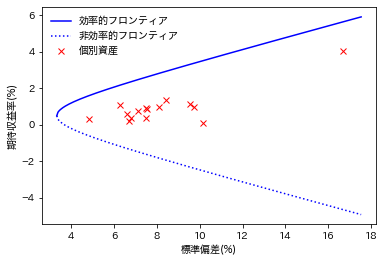

In [84]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [85]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [86]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

<Figure size 432x288 with 0 Axes>

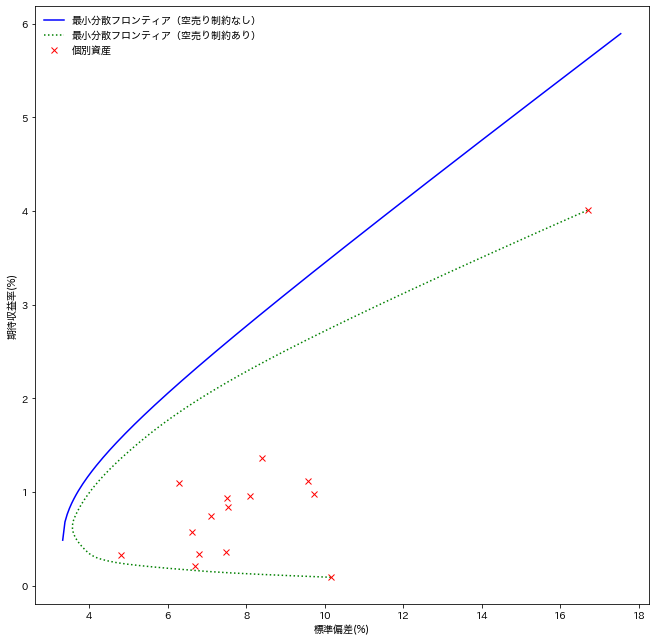

In [87]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')
plt.figure(figsize=(11, 11))           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり).png', dpi=500)
plt.show()

<Figure size 432x288 with 0 Axes>

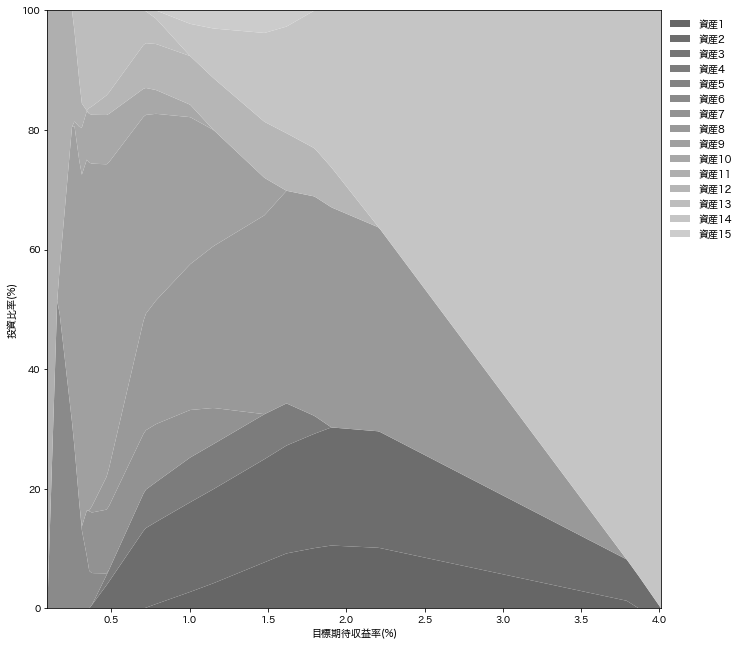

In [88]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [89]:
#以下の%.3fとV_Weight[i][~]についてはポートフォリオの銘柄の分だけないとエラーが出るので注意してください
for i in range(len(V_Weight)):
    if V_Target[i] <= 0 or V_Risk[i] >= 18:
        
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          
              %(V_Target[i],V_Risk[i],0))#math.log(-V_Target[i])+math.log(18-V_Risk[i])*100))
        
    else:
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              
              %(V_Target[i],V_Risk[i],math.log(V_Target[i])+math.log(18-V_Risk[i])*100))
              
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))#,V_Weight[i][15],V_Weight[i][16],V_Weight[i][17],V_Weight[i][18],V_Weight[i][19],V_Weight[i][20],V_Weight[i][21],V_Weight[i][22],V_Weight[i][23],V_Weight[i][24],V_Weight[i][25],V_Weight[i][26],V_Weight[i][27],V_Weight[i][28],V_Weight[i][29],V_Weight[i][30],V_Weight[i][31],V_Weight[i][32],V_Weight[i][33],V_Weight[i][34],V_Weight[i][35]))#,V_Weight[i][36],V_Weight[i][37],V_Weight[i][38],V_Weight[i][39],V_Weight[i][40],V_Weight[i][41],V_Weight[i][42],V_Weight[i][43],V_Weight[i][44],V_Weight[i][45],V_Weight[i][46],V_Weight[i][47],V_Weight[i][48],V_Weight[i][49],V_Weight[i][50],V_Weight[i][51],V_Weight[i][52],V_Weight[i][53],V_Weight[i][54],V_Weight[i][55]))
    print()

( 0 ) 目標収益率=0.091 リスク=10.154 効用=203.599
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,-0.000,0.000,-0.000,-0.000

( 1 ) 目標収益率=0.106 リスク=9.202 効用=215.214
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.129,0.000,0.000,0.000,0.000,0.871,0.000,0.000,0.000,0.000

( 2 ) 目標収益率=0.122 リスク=8.335 効用=224.747
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.257,0.000,0.000,0.000,0.000,0.743,0.000,0.000,0.000,0.000

( 3 ) 目標収益率=0.138 リスク=7.584 効用=232.356
ポートフォリオ=-0.000,-0.000,-0.000,0.000,-0.000,0.386,0.000,-0.000,0.000,0.000,0.614,-0.000,0.000,-0.000,-0.000

( 4 ) 目標収益率=0.153 リスク=6.984 効用=238.057
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.514,0.000,0.000,0.000,0.000,0.486,0.000,0.000,0.000,0.000

( 5 ) 目標収益率=0.169 リスク=6.502 効用=242.437
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.493,0.000,0.000,0.076,0.000,0.431,0.000,0.000,0.000,0.000

( 6 ) 目標収益率=0.185 リスク=6.050 効用=246.389
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.457,-0.000,-0.000,0.159,0.000,0.384,-0.000,0.000,-0.000,-0.000

( 7 ) 

## パフォーマンスの比較

In [90]:
Asset_Weight_tmp = []

for i in range(15):#数値はポートフォリオの数
    Asset_Weight_tmp.append(round(V_Weight[35][i], 3))#数値はそれぞれ効用が最大となる点と有効数字

In [91]:
#以下の0.02はたとえば最低配分を十万円とした場合、10/500で計算をして算出している
Asset_Weight = []

for i in  range(15):
    if Asset_Weight_tmp[i] == 0:
        Asset_Weight.append(0.02)
        
    else:
        Asset_Weight.append(round((Asset_Weight_tmp[i] * (1 - 0.02 * Asset_Weight_tmp.count(0))), 3))

In [92]:
Asset_Weight

[0.02,
 0.09,
 0.02,
 0.043,
 0.02,
 0.02,
 0.088,
 0.132,
 0.335,
 0.049,
 0.02,
 0.054,
 0.069,
 0.02,
 0.02]

In [95]:
#株価データの読み込み
Data1 = pd.read_csv('/Users/shintaro/Downloads/efficient_frontier(ver1.4).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']

In [96]:
Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 

In [97]:
Data2 #データにnanが含まれている場合、上の元のデータの空欄を0で埋めるなどで対応してください

日経平均      TOPIX       エーザイ      ファンケル       デンソー   三菱総合研究所  \
1    -3.303484  -0.712877  -1.608187   7.436050  -4.136691 -7.692308   
2    -0.706116  -0.779031   2.971768  -0.332226  -9.643527 -3.870968   
3     9.519130   9.474332  -3.751804  -1.555556  15.656146  2.796421   
4    -0.293419   0.840817  -3.298351  -5.530474  -0.718133  2.121872   
5   -11.654639 -10.797941  -5.891473 -25.328554 -11.211573 -9.376665   
..         ...        ...        ...        ...        ...       ...   
135   0.734620   4.800777   1.366307  -1.581028  15.012523  2.615193   
136  -1.254918  -2.853634  -3.908883  -4.417671  -3.919967  0.000000   
137   0.164685   1.303313   3.212232  -3.361345   6.289843 -5.339806   
138  -0.237525   1.070734  48.477847   4.347826   1.012928  1.153846   
139  -5.237443  -2.186183 -17.775744  -3.611111  -1.279852  1.013942   

          日本郵船      大日本印刷        京セラ       ＫＤＤＩ      ローソン        東洋紡  \
1     9.824561   4.911092   0.367197  -3.346856  0.000000  -6.164384   
2     2.875399  -5.165456  -3.536585  -0.524659 -5.243902  -1.459854   
3    14.596273   7.489362  15.170670   2.109705  2.702703  10.370370   
4     5.149051   3.325416   4.171240  -5.888430  4.260652   6.040268   
5   -15.721649 -14.559387 -16.438356  -9.549945 -6.850962  -9.493671   
..         ...        ...        ...        ...       ...        ...   
135  23.567921  21.159875   2.435112   3.191489  9.145729   6.110283   
136  13.642384  -6.382061  -5.523132  -2.621502 -9.760589  -7.162921   
137   5.244755   8.659604   1.280699  12.431942  0.612245   2.269289   
138  24.695460  -0.423908   2.171973  -6.779661  4.259635  -1.405325   
139   4.440497   9.237974  -1.907397  -3.838384  6.809339   3.825956   

       コニカミノルタ        ヤマト       三菱商事   アウトソーシング       三菱電機  
1    -2.941176  -2.507837  -5.119306 -11.945813   3.211679  
2    -0.541126  -2.893891   1.508916  -1.258741   3.111740  
3    18.715996   7.284768  10.360360  -2.549575  17.832647  
4     8.982585   0.925926  -8.408163  34.593023  -1.862631  
5   -13.961312 -12.844037  -8.556150 -20.302376 -11.387900  
..         ...        ...        ...        ...        ...  
135  11.317254   3.379416   4.229104   9.447853   7.520714  
136   3.000000  -1.783061  -3.514377  -5.773543  -0.296384  
137  -3.236246  18.154312  -1.192053  20.226056   0.594530  
138   2.675585   2.432778   1.474531  -0.098961  -4.669031  
139  -8.794788  -2.000000   1.122853   3.070827  -8.493490  

[139 rows x 17 columns]

In [98]:
#日経平均とTOPIXの列を消去します
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

'日経平均'

In [99]:
for i in range(15):
    Data2[column[i]] = (Data2[column[i]] * Asset_Weight[i])

In [100]:
for i in range(15):
    if i == 0:
        Data2['Portfolio'] = Data2[column[i]]
    
    else:
        Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[i]]

In [101]:
Data2

日経平均      TOPIX      エーザイ     ファンケル      デンソー   三菱総合研究所      日本郵船  \
1    -3.303484  -0.712877 -0.032164  0.669244 -0.082734 -0.330769  0.196491   
2    -0.706116  -0.779031  0.059435 -0.029900 -0.192871 -0.166452  0.057508   
3     9.519130   9.474332 -0.075036 -0.140000  0.313123  0.120246  0.291925   
4    -0.293419   0.840817 -0.065967 -0.497743 -0.014363  0.091240  0.102981   
5   -11.654639 -10.797941 -0.117829 -2.279570 -0.224231 -0.403197 -0.314433   
..         ...        ...       ...       ...       ...       ...       ...   
135   0.734620   4.800777  0.027326 -0.142292  0.300250  0.112453  0.471358   
136  -1.254918  -2.853634 -0.078178 -0.397590 -0.078399  0.000000  0.272848   
137   0.164685   1.303313  0.064245 -0.302521  0.125797 -0.229612  0.104895   
138  -0.237525   1.070734  0.969557  0.391304  0.020259  0.049615  0.493909   
139  -5.237443  -2.186183 -0.355515 -0.325000 -0.025597  0.043599  0.088810   

        大日本印刷       京セラ      ＫＤＤＩ      ローソン       東洋紡   コニカミノルタ       ヤマト  \
1    0.098222  0.032313 -0.441785  0.000000 -0.302055 -0.058824 -0.135423   
2   -0.103309 -0.311220 -0.069255 -1.756707 -0.071533 -0.010823 -0.156270   
3    0.149787  1.335019  0.278481  0.905405  0.508148  0.374320  0.393377   
4    0.066508  0.367069 -0.777273  1.427318  0.295973  0.179652  0.050000   
5   -0.291188 -1.446575 -1.260593 -2.295072 -0.465190 -0.279226 -0.693578   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.423197  0.214290  0.421277  3.063819  0.299404  0.226345  0.182488   
136 -0.127641 -0.486036 -0.346038 -3.269797 -0.350983  0.060000 -0.096285   
137  0.173192  0.112702  1.641016  0.205102  0.111195 -0.064725  0.980333   
138 -0.008478  0.191134 -0.894915  1.426978 -0.068861  0.053512  0.131370   
139  0.184759 -0.167851 -0.506667  2.281128  0.187472 -0.175896 -0.108000   

         三菱商事  アウトソーシング      三菱電機  Portfolio  
1   -0.353232 -0.238916  0.064234  -0.915397  
2    0.104115 -0.025175  0.062235  -2.610220  
3    0.714865 -0.050992  0.356653   5.475323  
4   -0.580163  0.691860 -0.037253   1.299842  
5   -0.590374 -0.406048 -0.227758 -11.294862  
..        ...       ...       ...        ...  
135  0.291808  0.188957  0.150414   6.231096  
136 -0.242492 -0.115471 -0.005928  -5.261991  
137 -0.082252  0.404521  0.011891   3.255779  
138  0.101743 -0.001979 -0.093381   2.761766  
139  0.077477  0.061417 -0.169870   1.090268  

[139 rows x 18 columns]

In [102]:
df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']
df['Portfolio'] = Data2['Portfolio']

In [103]:
df

日経平均      TOPIX  Portfolio
1    -3.303484  -0.712877  -0.915397
2    -0.706116  -0.779031  -2.610220
3     9.519130   9.474332   5.475323
4    -0.293419   0.840817   1.299842
5   -11.654639 -10.797941 -11.294862
..         ...        ...        ...
135   0.734620   4.800777   6.231096
136  -1.254918  -2.853634  -5.261991
137   0.164685   1.303313   3.255779
138  -0.237525   1.070734   2.761766
139  -5.237443  -2.186183   1.090268

[139 rows x 3 columns]

<AxesSubplot:>

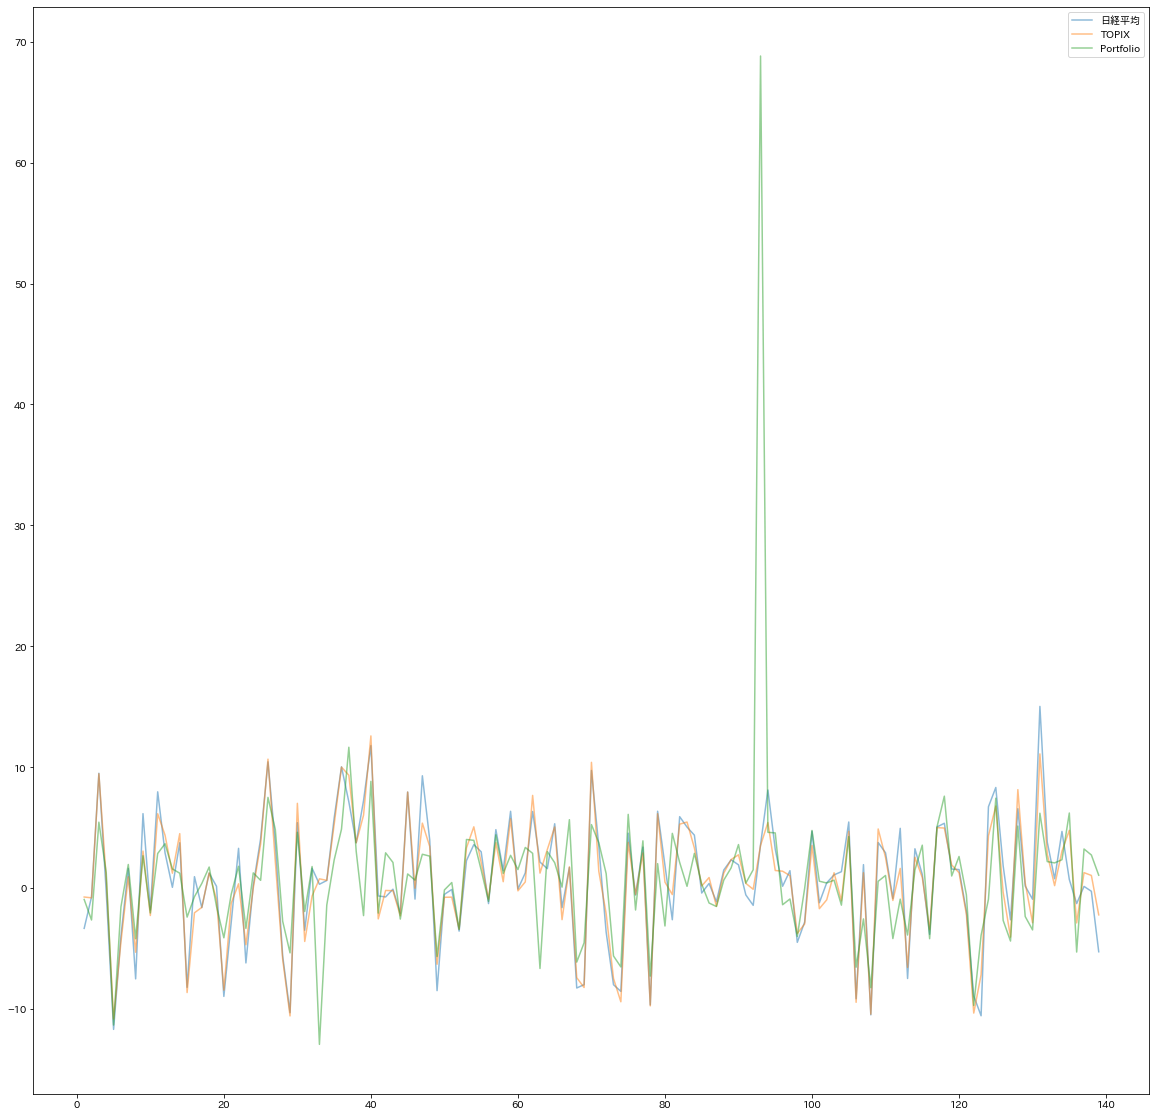

In [104]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較.png', dpi = 500)

In [105]:
#以下のPerform1とPerform2でそれぞれ日経平均とTOPIXに何回勝っているのかを見ることができます
l_d = len(df)
Perform1 = []
for i in range(l_d):
    if df.iloc[i, 0] <  df.iloc[i, 2]:
        Perform1.append('Win')
    else:
        Perform1.append('Lose')
        
Perform2 = []
for i in range(l_d):
    if df.iloc[i, 1] < df.iloc[i, 2]:
        Perform2.append('Win')
    else:
        Perform2.append('Lose')

In [108]:
Perform1.count('Win')

70

In [109]:
Perform2.count('Win')

71

In [110]:
for i in range (3):
    for j in range(len(df)):
        if j == 0:
            df.iloc[j, i] = df.iloc[j, i]
            
        else:
            df.iloc[j, i] = df.iloc[j, i] + df.iloc[j - 1, i]

In [111]:
df

日経平均      TOPIX   Portfolio
1     -3.303484  -0.712877   -0.915397
2     -4.009600  -1.491907   -3.525617
3      5.509530   7.982424    1.949705
4      5.216111   8.823241    3.249547
5     -6.438528  -1.974700   -8.045315
..          ...        ...         ...
135  119.939416  92.831388  124.316221
136  118.684498  89.977755  119.054230
137  118.849183  91.281067  122.310009
138  118.611658  92.351801  125.071775
139  113.374215  90.165618  126.162042

[139 rows x 3 columns]

<AxesSubplot:>

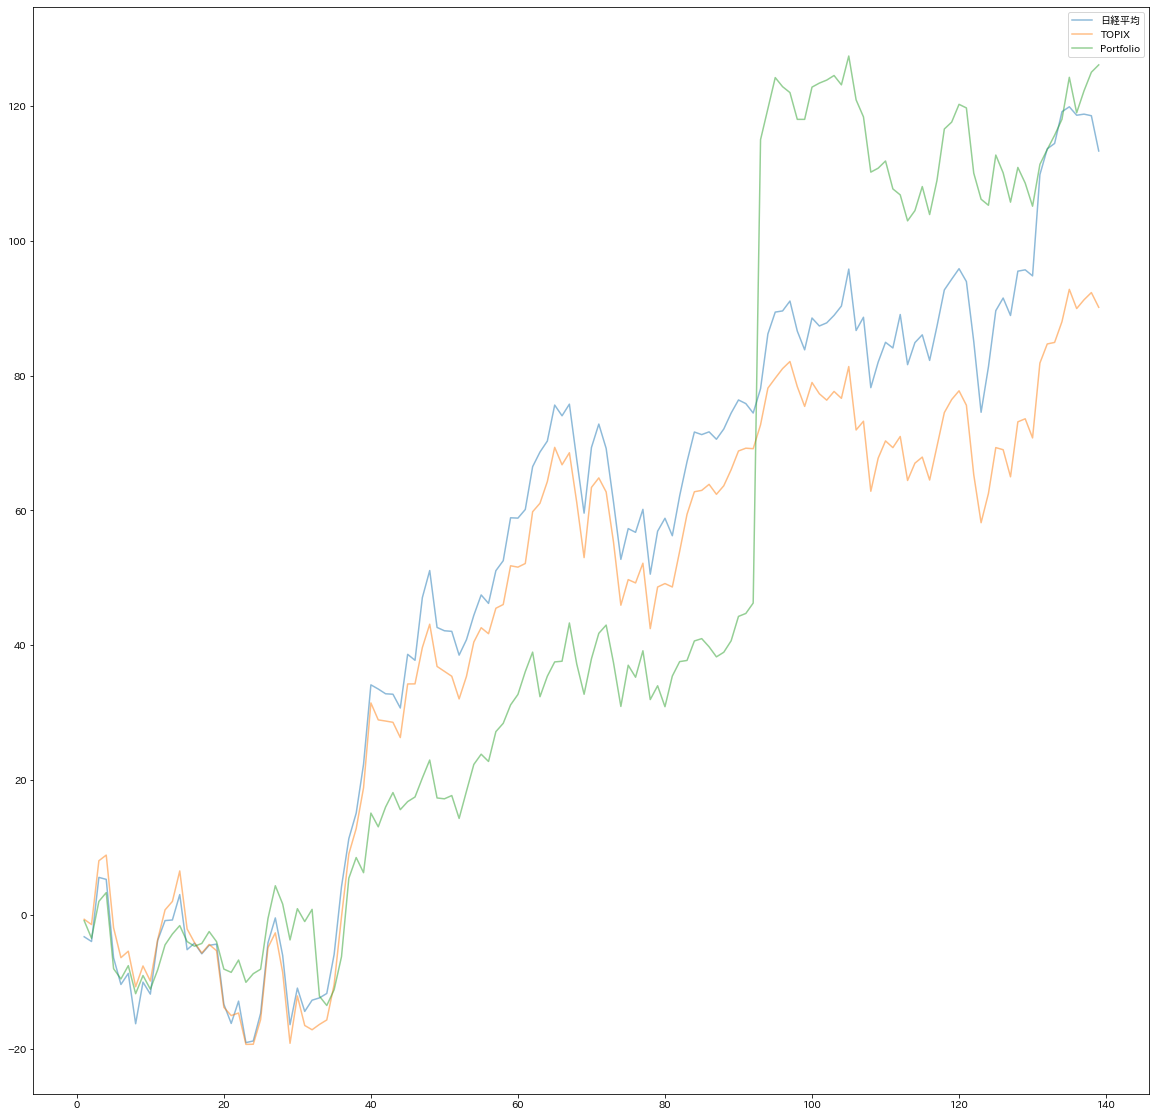

In [112]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較_累積.png', dpi = 500)